In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df=pd.read_csv("C:/Users/RISHYENDRA KUMAR/mloperation/data/Ames_Housing_Sales.csv")

In [2]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,0,Pave,8,856,AllPub,0,2003,2003,2008,208500
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,0,Pave,6,1262,AllPub,298,1976,1976,2007,181500
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,0,Pave,6,920,AllPub,0,2001,2002,2008,223500
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,0,Pave,7,756,AllPub,0,1915,1970,2006,140000
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,0,Pave,9,1145,AllPub,192,2000,2000,2008,250000


In [3]:
df.dtypes

1stFlrSF         int64
2ndFlrSF         int64
3SsnPorch        int64
Alley           object
BedroomAbvGr     int64
                 ...  
WoodDeckSF       int64
YearBuilt        int64
YearRemodAdd     int64
YrSold           int64
SalePrice        int64
Length: 80, dtype: object

In [4]:
df.shape

(1379, 80)

In [5]:
df.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           1297
BedroomAbvGr       0
                ... 
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
SalePrice          0
Length: 80, dtype: int64

In [6]:
df=df.drop(['Alley','Fence','MasVnrType','MiscFeature','PoolQC'],axis=1)

In [7]:
df.duplicated().sum()

0

In [8]:
for col in df.select_dtypes(include=[object]).columns:
    print(df[col].value_counts())
    print('-------')

BldgType
1Fam      1166
TwnhsE     113
Duplex      40
Twnhs       38
2fmCon      22
Name: count, dtype: int64
-------
BsmtCond
TA    889
Gd     47
Fa     17
Name: count, dtype: int64
-------
BsmtExposure
No    582
Av    169
Gd    117
Mn     85
Name: count, dtype: int64
-------
BsmtFinType1
GLQ    408
ALQ    209
BLQ    141
Rec    126
LwQ     69
Name: count, dtype: int64
-------
BsmtFinType2
Unf    790
Rec     53
LwQ     46
BLQ     32
ALQ     19
GLQ     12
Name: count, dtype: int64
-------
BsmtQual
TA    442
Gd    416
Ex     87
Fa      8
Name: count, dtype: int64
-------
CentralAir
Y    1310
N      69
Name: count, dtype: int64
-------
Condition1
Norm      1195
Feedr       69
Artery      44
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64
-------
Condition2
Norm      1365
Feedr        5
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
-------
Electrical
SBr

In [9]:
nu_df = df.select_dtypes(include=['float64','int64'])
n_df=nu_df.drop(['3SsnPorch','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','KitchenAbvGr','LowQualFinSF','MiscVal','PoolArea','ScreenPorch'],axis=1)
incat_df=nu_df[['3SsnPorch','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','KitchenAbvGr','LowQualFinSF','MiscVal','PoolArea','ScreenPorch']]

In [10]:
n_df.dtypes

1stFlrSF          int64
2ndFlrSF          int64
BedroomAbvGr      int64
BsmtFinSF1        int64
BsmtFullBath      int64
BsmtUnfSF         int64
Fireplaces        int64
FullBath          int64
GarageArea        int64
GarageCars        int64
GarageYrBlt       int64
GrLivArea         int64
HalfBath          int64
LotArea           int64
LotFrontage     float64
MSSubClass        int64
MasVnrArea        int64
MoSold            int64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotRmsAbvGrd      int64
TotalBsmtSF       int64
WoodDeckSF        int64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
SalePrice         int64
dtype: object

In [11]:
n_df.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
BsmtFullBath    0
BsmtUnfSF       0
Fireplaces      0
FullBath        0
GarageArea      0
GarageCars      0
GarageYrBlt     0
GrLivArea       0
HalfBath        0
LotArea         0
LotFrontage     0
MSSubClass      0
MasVnrArea      0
MoSold          0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
SalePrice       0
dtype: int64

<Axes: >

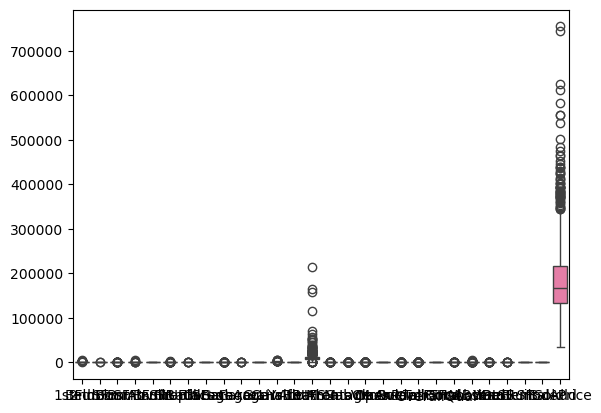

In [12]:
#checking outliers
sns.boxplot(n_df)

In [13]:
def wisker(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [14]:
for col in n_df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(col)
  n_df[col]=np.where(n_df[col]<lower,lower,n_df[col])
  n_df[col]=np.where(n_df[col]>upper,upper,n_df[col])

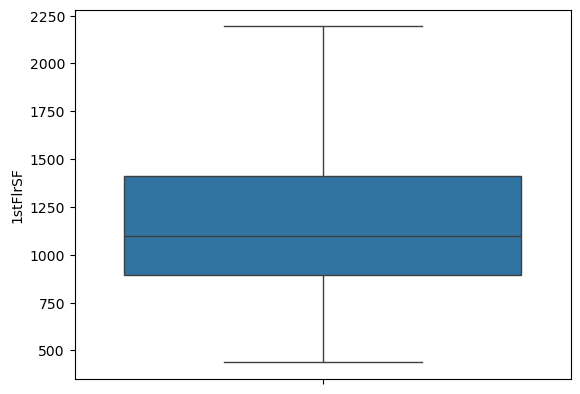

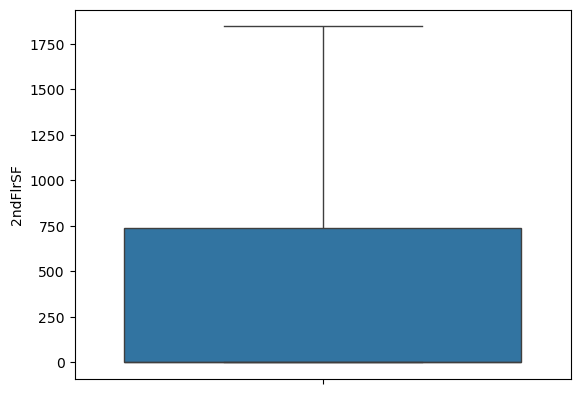

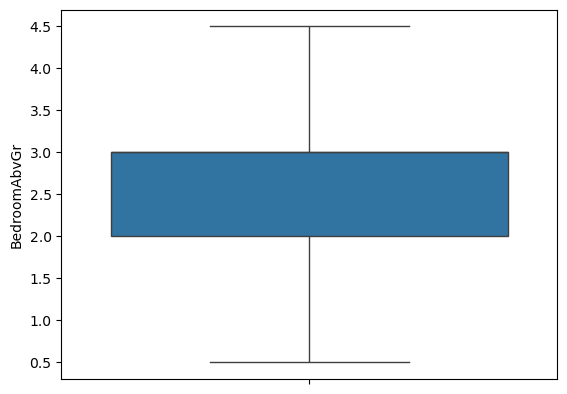

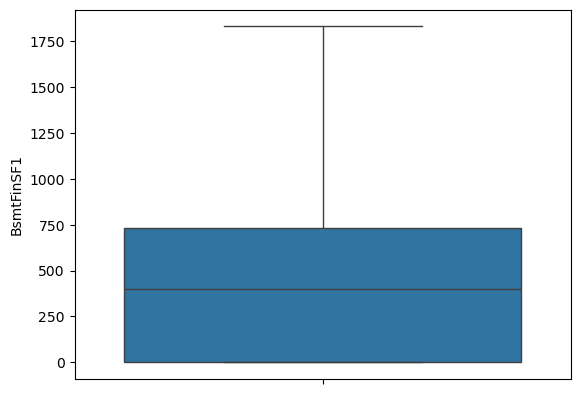

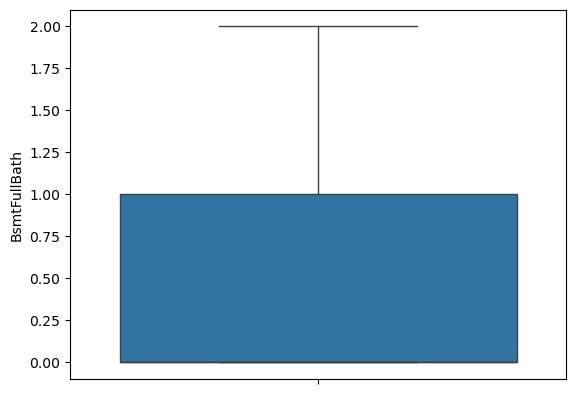

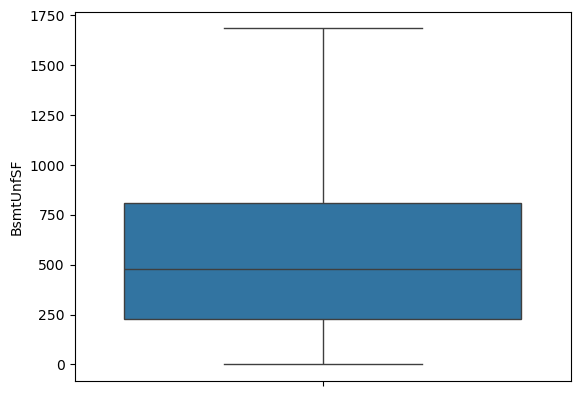

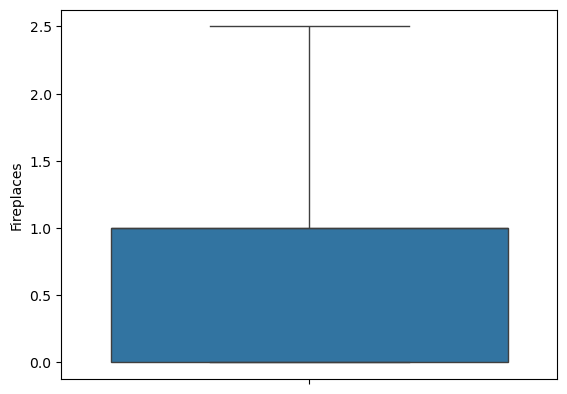

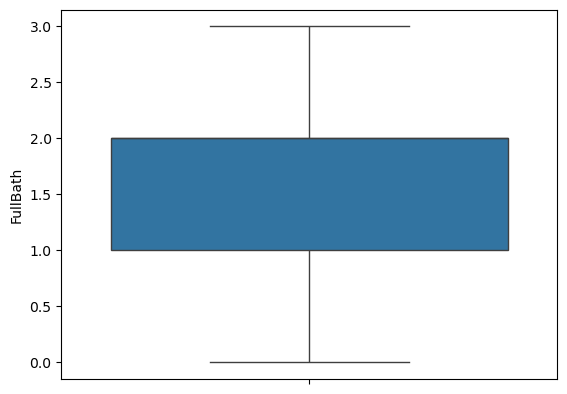

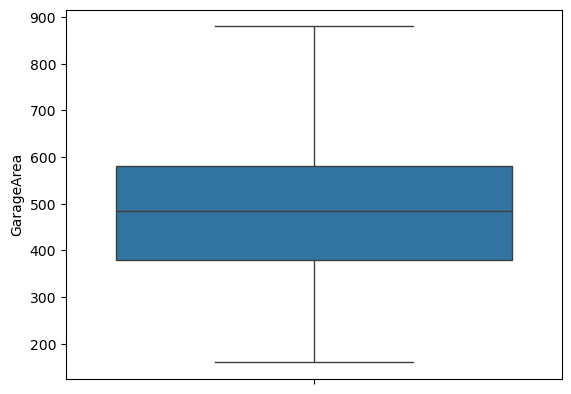

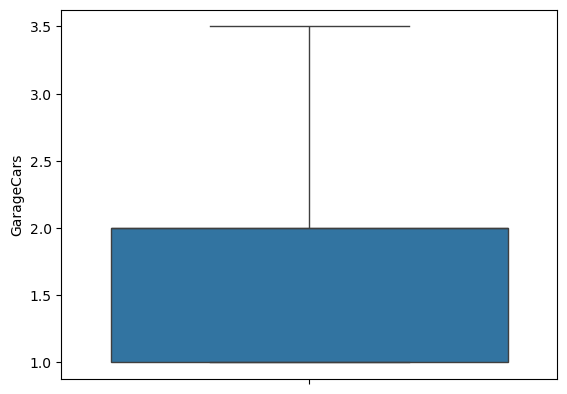

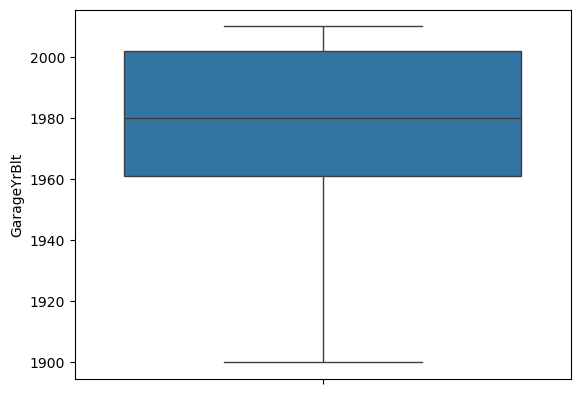

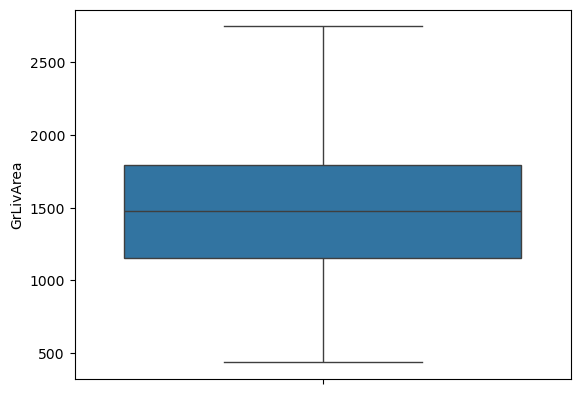

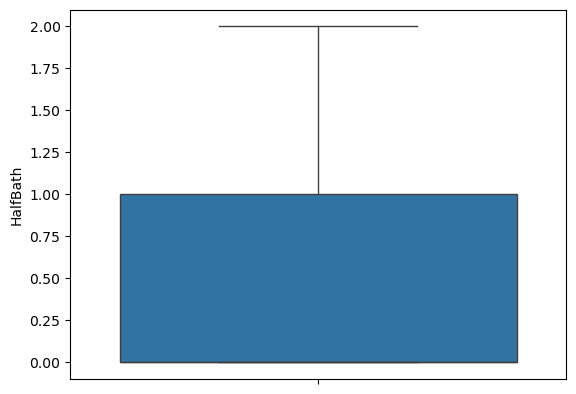

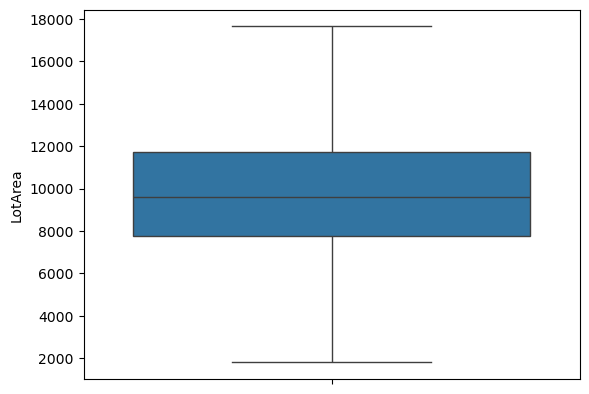

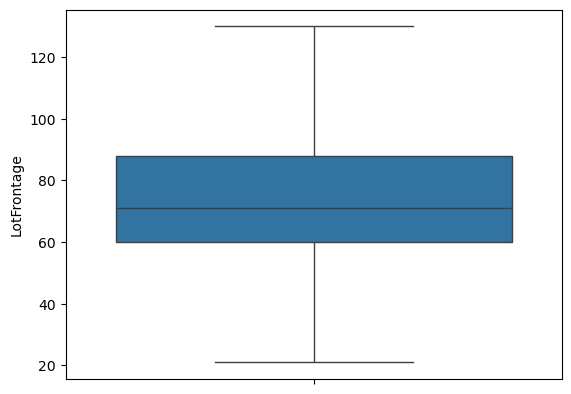

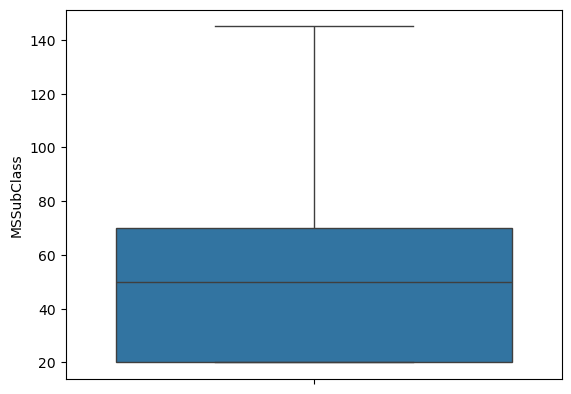

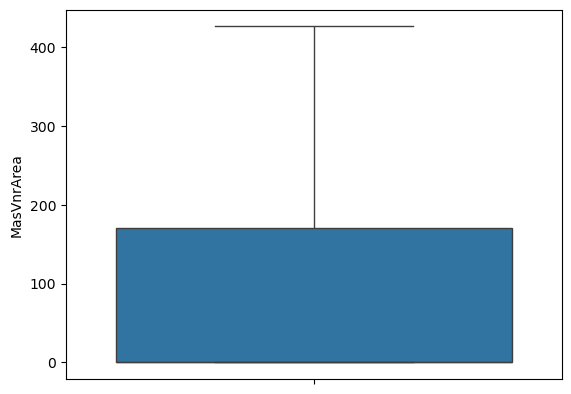

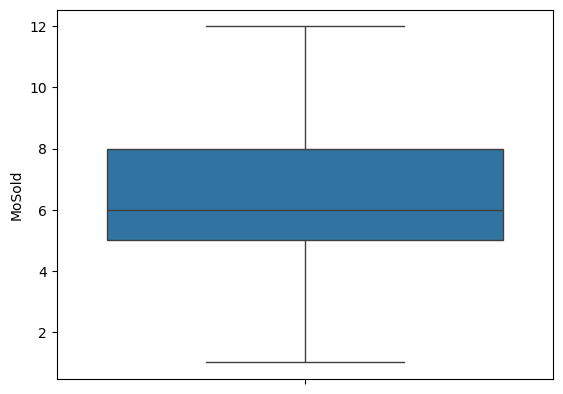

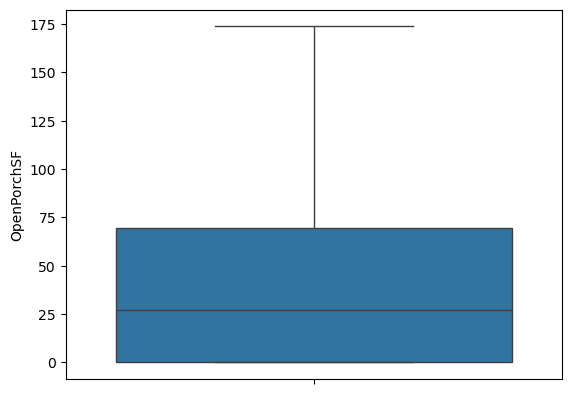

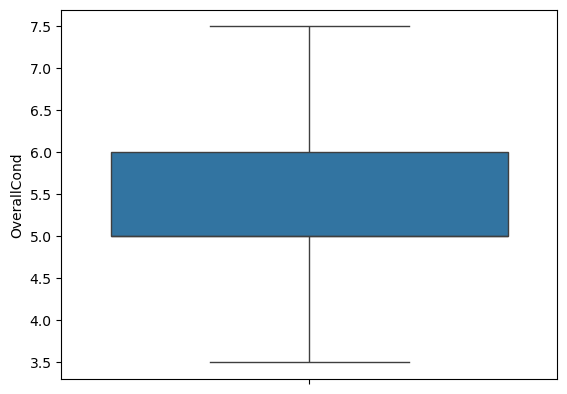

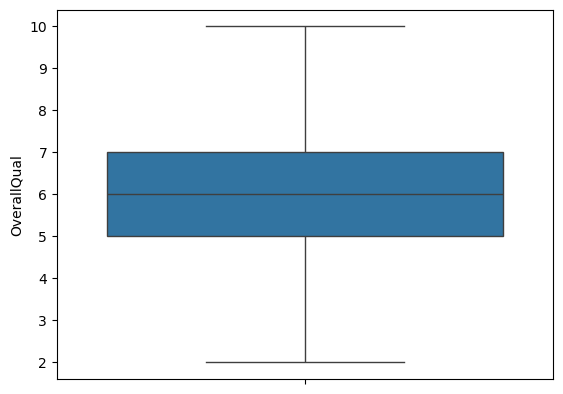

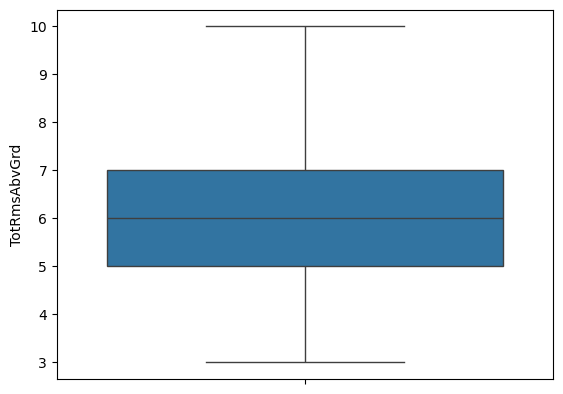

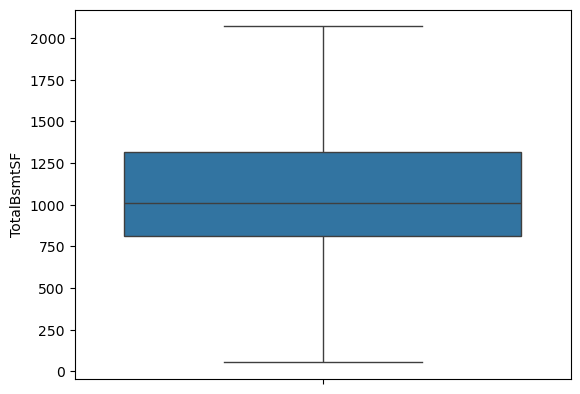

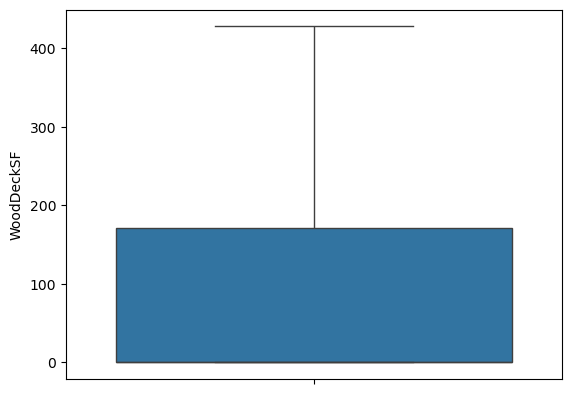

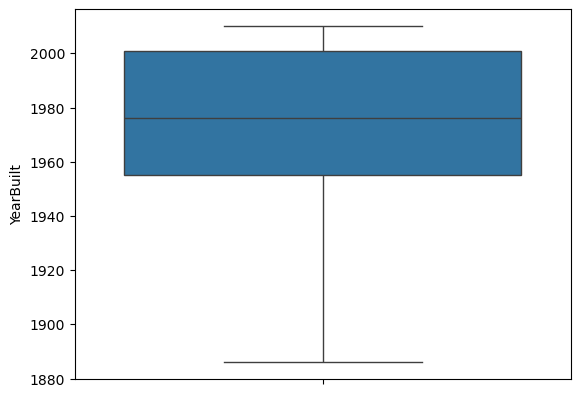

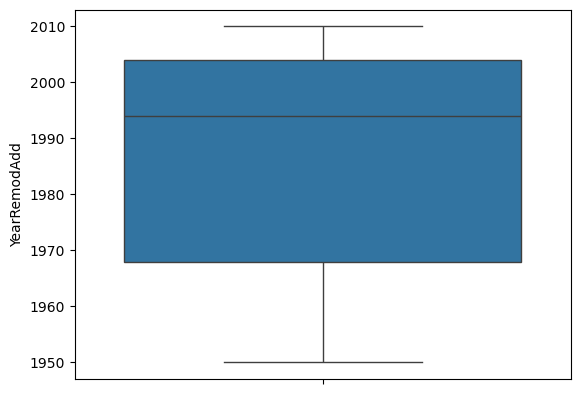

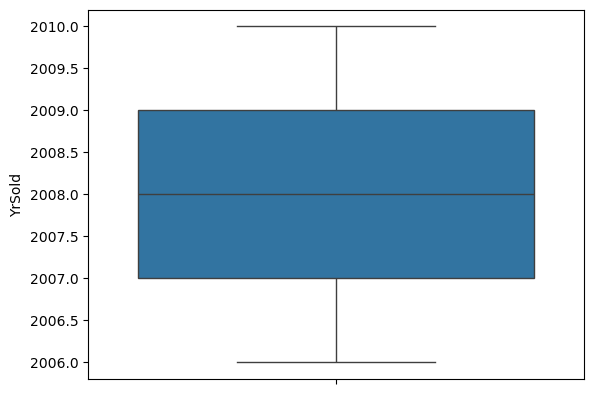

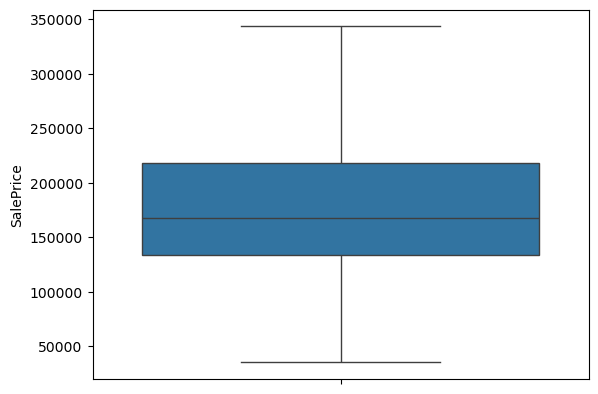

In [15]:
for col in n_df.columns:
    sns.boxplot(n_df[col])
    plt.show()

In [16]:
#scaling num data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mm=MinMaxScaler()
s_df=ss.fit_transform(n_df)
#s_df=mm.fit_transform(n_df)

In [17]:
s_df = pd.DataFrame(s_df, columns=n_df.columns)

<Axes: >

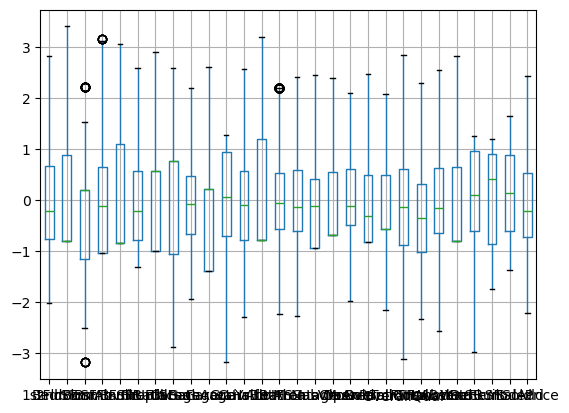

In [18]:
s_df.boxplot()

In [19]:
incat_df = incat_df.astype(str)
incat_df.dtypes

3SsnPorch        object
BsmtFinSF2       object
BsmtHalfBath     object
EnclosedPorch    object
KitchenAbvGr     object
LowQualFinSF     object
MiscVal          object
PoolArea         object
ScreenPorch      object
dtype: object

In [20]:
cate_df = df.select_dtypes(include=['object'])
#e_df.reset_index(inplace = True)
cat_df=pd.concat([pd.DataFrame(cate_df),incat_df],axis=1)

In [21]:
cat_df.isnull().mean()*100

BldgType          0.000000
BsmtCond         30.891951
BsmtExposure     30.891951
BsmtFinType1     30.891951
BsmtFinType2     30.964467
BsmtQual         30.891951
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
FireplaceQu      44.815083
Foundation        0.000000
Functional        0.000000
GarageCond        0.000000
GarageFinish      0.000000
GarageQual        0.000000
GarageType        0.000000
Heating           0.000000
HeatingQC         0.000000
HouseStyle        0.000000
KitchenQual       0.000000
LandContour       0.000000
LandSlope         0.000000
LotConfig         0.000000
LotShape          0.000000
MSZoning          0.000000
Neighborhood      0.000000
PavedDrive        0.000000
RoofMatl          0.000000
RoofStyle         0.000000
SaleCondition     0.000000
SaleType          0.000000
Street            0.000000
U

In [22]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
col=cat_df.columns
cat_df[col]=si.fit_transform(cat_df[col])

In [23]:
cat_df.isnull().sum()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
3SsnPorch        0
BsmtFinSF2       0
BsmtHalfBath     0
EnclosedPorch    0
KitchenAbvGr     0
LowQualFinSF     0
MiscVal          0
PoolArea         0
ScreenPorch      0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
oh=OneHotEncoder(drop='first')
for col in cat_df.columns:
    cat_df[col]=le.fit_transform(cat_df[col])

In [25]:
cat_df.dtypes

BldgType         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
BsmtQual         int32
CentralAir       int32
Condition1       int32
Condition2       int32
Electrical       int32
ExterCond        int32
ExterQual        int32
Exterior1st      int32
Exterior2nd      int32
FireplaceQu      int32
Foundation       int32
Functional       int32
GarageCond       int32
GarageFinish     int32
GarageQual       int32
GarageType       int32
Heating          int32
HeatingQC        int32
HouseStyle       int32
KitchenQual      int32
LandContour      int32
LandSlope        int32
LotConfig        int32
LotShape         int32
MSZoning         int32
Neighborhood     int32
PavedDrive       int32
RoofMatl         int32
RoofStyle        int32
SaleCondition    int32
SaleType         int32
Street           int32
Utilities        int32
3SsnPorch        int32
BsmtFinSF2       int32
BsmtHalfBath     int32
EnclosedPorch    int32
KitchenAbvGr     int32
LowQualFinS

In [26]:
cat_df.reset_index(inplace = True)
df_final=pd.concat([pd.DataFrame(s_df),cat_df],axis=1)
df_final

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,...,Utilities,3SsnPorch,BsmtFinSF2,BsmtHalfBath,EnclosedPorch,KitchenAbvGr,LowQualFinSF,MiscVal,PoolArea,ScreenPorch
0,-0.869472,1.141314,0.194696,0.582250,1.107785,-0.963119,-1.000242,0.766392,0.291809,0.209631,...,0,0,0,0,0,0,0,0,0,0
1,0.248689,-0.805121,0.194696,1.205660,-0.838248,-0.653807,0.562742,0.766392,-0.211776,0.209631,...,0,0,0,1,0,0,0,0,0,0
2,-0.693211,1.168664,0.194696,0.078021,1.107785,-0.307562,0.562742,0.766392,0.635162,0.209631,...,0,0,0,0,0,0,0,0,0,0
3,-0.580293,0.917952,0.194696,-0.540805,1.107785,-0.062882,0.562742,-1.058918,0.829729,1.811190,...,0,0,0,0,71,0,0,0,0,0
4,-0.073540,1.594874,1.540492,0.465361,1.107785,-0.178297,0.562742,0.766392,1.939904,1.811190,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,-0.602325,0.776642,0.194696,-1.035867,-0.838248,0.890446,0.562742,0.766392,-0.211776,0.209631,...,0,0,0,0,0,0,0,0,0,0
1375,2.482258,-0.805121,0.194696,0.774774,1.107785,0.050224,2.125727,0.766392,0.017126,0.209631,...,0,0,28,0,0,0,0,0,0,0
1376,0.044886,1.820515,1.540492,-0.405580,-0.838248,0.715015,2.125727,0.766392,-1.402067,-1.391927,...,0,0,0,0,0,0,0,7,0,0
1377,-0.258064,-0.805121,-1.151099,-0.923561,1.107785,-1.309364,-1.000242,-1.058918,-1.470738,-1.391927,...,0,0,1,0,4,0,0,0,0,0


In [27]:
df_new=df_final.dropna()

In [28]:
df_new.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,...,Utilities,3SsnPorch,BsmtFinSF2,BsmtHalfBath,EnclosedPorch,KitchenAbvGr,LowQualFinSF,MiscVal,PoolArea,ScreenPorch
0,-0.869472,1.141314,0.194696,0.582250,1.107785,-0.963119,-1.000242,0.766392,0.291809,0.209631,...,0,0,0,0,0,0,0,0,0,0
1,0.248689,-0.805121,0.194696,1.205660,-0.838248,-0.653807,0.562742,0.766392,-0.211776,0.209631,...,0,0,0,1,0,0,0,0,0,0
2,-0.693211,1.168664,0.194696,0.078021,1.107785,-0.307562,0.562742,0.766392,0.635162,0.209631,...,0,0,0,0,0,0,0,0,0,0
3,-0.580293,0.917952,0.194696,-0.540805,1.107785,-0.062882,0.562742,-1.058918,0.829729,1.811190,...,0,0,0,0,71,0,0,0,0,0
4,-0.073540,1.594874,1.540492,0.465361,1.107785,-0.178297,0.562742,0.766392,1.939904,1.811190,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_new.shape

(1379, 76)

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x=df_new.drop('SalePrice',axis=1)
x = StandardScaler().fit_transform(x)


n_components = 30 # Change this to the desired number of components

 # Perform PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC {i+1}' for i in range(n_components)])

# # Combine with other data
finalDf = pd.concat([principalDf, df_new[['SalePrice']]], axis=1)


In [31]:
finalDf.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,SalePrice
0,2.135106,-0.710633,-2.172467,0.709176,-0.536515,-1.541823,0.305886,-0.298111,0.628213,-1.682015,...,-0.838180,1.187102,1.011799,-0.224902,-0.361382,0.853576,0.005998,-0.649602,1.026965,0.401148
1,-0.017212,-0.581960,2.264907,1.147933,-1.003568,0.419627,-1.350227,0.269124,-0.390912,-0.065611,...,-0.318145,0.300793,-1.358924,-1.913001,-0.506482,-0.739456,0.671862,0.114359,0.852520,-0.004878
2,2.670189,-0.229627,-1.424066,1.093523,-1.105415,-1.517374,0.445470,-0.832678,-0.369249,-0.799487,...,0.324514,0.116056,0.999737,-0.152737,-0.253299,0.385483,0.302630,-0.008755,0.454473,0.626718
3,-1.420620,1.611270,-0.337260,0.211539,0.101861,-1.972520,0.769365,0.422346,0.540511,-0.702279,...,0.919062,0.231751,-1.712353,-0.863495,0.514517,0.795030,-1.443219,-0.468894,3.081312,-0.628955
4,5.319564,1.768656,-0.524255,1.580936,-0.244815,-1.223137,0.580297,-0.788780,0.115994,-1.074155,...,0.193468,-0.452920,0.237992,-0.725553,-0.430359,0.159918,0.791197,0.090106,-0.333546,1.025225


In [32]:
X=finalDf.drop('SalePrice',axis=1)
y=finalDf['SalePrice']

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Initialize the Random Forest Regressor
rf_r = RandomForestRegressor(n_estimators=3000, random_state=42)

# Train the model
rf_r.fit(X_train, y_train)

y_train_pred = rf_r.predict(X_train)
y_test_pred = rf_r.predict(X_test)


#print("mae_train", mean_absolute_error(y_train, y_train_pred))
print("mae_test",mean_absolute_error(y_test, y_test_pred))

#print("mse_train", mean_squared_error(y_train, y_train_pred))
print("mse_test",mean_squared_error(y_test, y_test_pred))

print("r2_train: " , r2_score(y_train, y_train_pred))
print("r2_test",r2_score(y_test, y_test_pred))

mae_test 0.24854607193157952
mse_test 0.13162652440298714
r2_train:  0.981947869234362
r2_test 0.8782159460228249


In [35]:
import mlflow

In [36]:
import os
os.environ['GIT_PYTHON_REFRESH']='quit'
os.environ['MLFLOW_TRACKING_URI']='file///C:/mlflowexperiments'

In [37]:
import mlflow
mlflow.set_experiment("Ames_House_Price")
mlflow.set_experiment_tag("ames_house_tag","exi")

In [38]:
with mlflow.start_run():    
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.1)
    #rf_n_estimators=5000
    LR=LinearRegression()
    svr=SVR(kernel='rbf')
    #logging parameters
    mlflow.log_param("rf_n_estimators",5000)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    mlflow.log_param('svr_kernel','rbf')
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    lr=LR.fit(X_train,y_train)
    svr=svr.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    training_score_lr=LR.score(X_train,y_train)
    training_score_svr=svr.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    mlflow.log_metric("lr_training_score",training_score_lr)
    mlflow.log_metric("svr-training_score",training_score_svr)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    y_pred_lr=lr.predict(X_test)
    y_pred_svr=svr.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    testing_score_lr=r2_score(y_pred_lr,y_test)
    testing_score_svr=r2_score(y_pred_svr,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    mlflow.log_metric("lr_testing_score",testing_score_lr)
    mlflow.log_metric("svr_testing_score",testing_score_svr)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(lr,"linear-regression-model")
    mlflow.sklearn.log_model(svr,"support-vector-regression-model")